# I. 영화 리뷰 데이터 탐색적 분석(EDA)

---
### 1) 데이터 로드 : dataframe (pandas module 사용)  
네이버 영화평 데이터셋 : https://github.com/e9t/nsmc

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # 경고 메시지 안보이게 설정

import gc # garbage collector : 메모리 관리
gc.collect()

54

In [2]:
import os

---
전역 변수 중 일부(디렉토리 이름과 파일 이름 등)는 대문자로  
나머지 변수는 소문자로

In [3]:
# 파일 경로는 단순히 문자열 연결보다는 os.path.join()을 사용하는 것이 좋음 
DATA_DIR = 'data'

TRAIN_DATA_FILE = 'ratings_train.txt'
TEST_DATA_FILE = 'ratings_test.txt'

TRAIN_DATA_PATH = os.path.join(DATA_DIR, TRAIN_DATA_FILE)
TEST_DATA_PATH = os.path.join(DATA_DIR, TEST_DATA_FILE)

In [4]:
import pandas as pd

In [5]:
# pandas data frame
train_df = pd.read_table(TRAIN_DATA_PATH) # pd.read_csv(TRAIN_DATA_PATH, sep='\t') 동일한 기능
test_df = pd.read_table(TEST_DATA_PATH)

---
### 2) 데이터 기본 정보 보기

---
#### (가) train dataset

In [6]:
train_df.head() # 맨 위 5개 행

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


label : 0 부정 평가, 1 긍정 평가  

---

In [7]:
# 특정 행 데이터 보기
print(train_df.loc[0]) # 인덱스 번호로 데이터(행) 불러오기
print('----------')
print(train_df.iloc[0]) # 행번호로 데이터(행) 불러오기, 인덱스가 없으므로 위와 동일
print('----------')
print(train_df[train_df['id']==9976970]) # id 값이 9976970인 데이터(행) 불러오기

id                      9976970
document    아 더빙.. 진짜 짜증나네요 목소리
label                         0
Name: 0, dtype: object
----------
id                      9976970
document    아 더빙.. 진짜 짜증나네요 목소리
label                         0
Name: 0, dtype: object
----------
        id             document  label
0  9976970  아 더빙.. 진짜 짜증나네요 목소리      0


In [8]:
train_df.info() # 데이터프레임의 기본 정보 보기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149999 entries, 0 to 149998
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        149999 non-null  int64 
 1   document  149994 non-null  object
 2   label     149999 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [9]:
train_df.describe() # 숫자 데이터에 대한 통계정보, 이 데이터에는 별 소용이 없음

,id,label
count,1.499990e+05,149999.00000
mean,6.743514e+06,0.49885
std,2.919052e+06,0.50000
min,3.300000e+01,0.00000
25%,4.766814e+06,0.00000
50%,7.526832e+06,0.00000
75%,9.249429e+06,1.00000
max,1.027815e+07,1.00000


In [10]:
train_df.shape

(149999, 3)

---
#### (나) test dataset :

In [11]:
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        50000 non-null  int64 
 1   document  49997 non-null  object
 2   label     50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [13]:
test_df.describe()

,id,label
count,5.000000e+04,50000.000000
mean,6.728496e+06,0.503460
std,2.936824e+06,0.499993
min,6.010000e+02,0.000000
25%,4.736397e+06,0.000000
50%,7.530602e+06,1.000000
75%,9.246413e+06,1.000000
max,1.027809e+07,1.000000


In [14]:
test_df.shape

(50000, 3)

---
### 3) 결측 데이터 처리 : nul 데이터는 통계분석에 방해가 되므로 먼저 제거한다.

In [15]:
print('null data가 있는가? : ', train_df.isnull().values.any())
print('----------')
print('null data 건수 \n', '-----\n', train_df.isnull().sum())

null data가 있는가? :  True
----------
null data 건수 
 -----
 id          0
document    5
label       0
dtype: int64


In [16]:
# null 값 데이터 행 출력
train_df[train_df['document'].isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [17]:
train_no_nan_df = train_df.dropna(axis=0) # nan이 있는 모든 row를 없애는 코드
test_no_nan_df = test_df.dropna(axis=0)
# train_data_df['document'] = train_data_df['document'].fillna('S') # nan에 다른 데이터를 대신 넣는 방법

In [18]:
# nul 값 제거 확인
print('train data에 null data가 있는가? : ', train_no_nan_df.isnull().values.any())
print('test data에 null data가 있는가? : ', test_no_nan_df.isnull().values.any())

train data에 null data가 있는가? :  False
test data에 null data가 있는가? :  False


In [19]:
# dataset의 shape 출력
print('shape of no nan train data : ', train_no_nan_df.shape)
print('shape of no nan test data : ', test_no_nan_df.shape)

shape of no nan train data :  (149994, 3)
shape of no nan test data :  (49997, 3)


---
### 4) EDA (Exploratory Data Analysis; 탐색적 데이터 분석)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

---
train dataset의 긍정평가(label:1)와 부정평가(label:0) 건수

<AxesSubplot:xlabel='label', ylabel='count'>

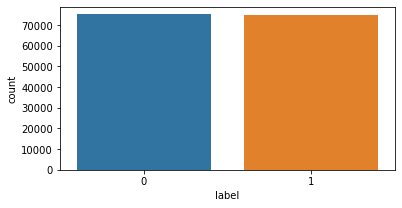

In [21]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(train_no_nan_df['label'])

In [22]:
print(train_no_nan_df.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  75169
1      1  74825


<AxesSubplot:xlabel='label', ylabel='count'>

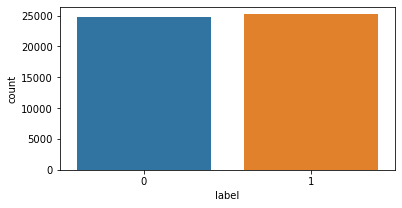

In [23]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(test_no_nan_df['label'])

In [24]:
print(test_no_nan_df.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  24826
1      1  25171


---
#### (가) 문장의 길이(글자수) 분포 조사

In [25]:
train_length = train_no_nan_df['document'].apply(len) # 이런식으로 쓰면 데이터가 없는 행에서 아래와 같은 에러가 난다.
# TypeError: object of type 'float' has no len()
test_length = test_no_nan_df['document'].apply(len)

# train_length = train_no_nan_df['document'].str.len() # NaN 값이 있는 경우 길이를 계산하지 않고 길이 값도 NaN이 된다.
# test_length = test_no_nan_df['document'].str.len()

In [26]:
# print(train_length)
train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

In [27]:
test_length.head()

0     3
1    20
2    38
3    32
4    49
Name: document, dtype: int64

In [28]:
train_length.describe()

count    149994.000000
mean         35.204602
std          29.531974
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document, dtype: float64

In [29]:
test_length.describe()

count    49997.000000
mean        35.320259
std         29.648310
min          1.000000
25%         16.000000
50%         27.000000
75%         43.000000
max        144.000000
Name: document, dtype: float64

In [30]:
import numpy as np

In [31]:
np.median(train_length) # NaN 값이 있으면 에러
# np.nanmedian(train_length) # NaN 값이 있어도 빼고 계산

27.0

In [32]:
print('문자 길이 최대 값: {}'.format(np.max(train_length)))
print('문자 길이 최소 값: {}'.format(np.min(train_length)))
print('문자 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('문자 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('문자 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문자 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25))) # nanpercentile()을 쓰면 NaN 값이 있을 때도 에러 안남.
print('문자 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75))) # nanpercentile()을 쓰면 NaN 값이 있을 때도 에러 안남.

문자 길이 최대 값: 146
문자 길이 최소 값: 1
문자 길이 평균 값: 35.20
문자 길이 표준편차: 29.53
문자 길이 중간 값: 27.0
문자 길이 제 1 사분위: 16.0
문자 길이 제 3 사분위: 42.0


Text(0, 0.5, 'Number of text')

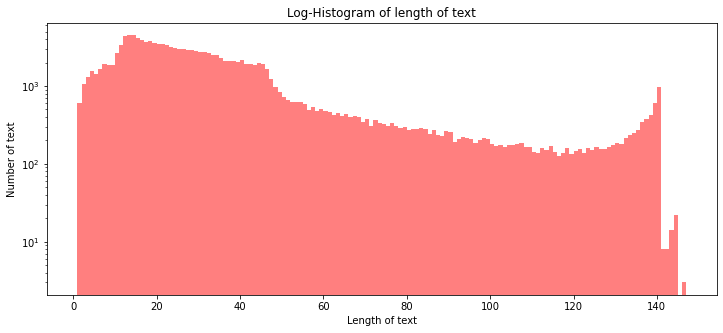

In [33]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위, bin의 갯수
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
# range: 이상, 미만
plt.hist(train_length, range=(1, 147), bins=146, alpha=0.5, color= 'r',  label='train')
plt.yscale('log', nonpositive='clip')
# 그래프 제목
plt.title('Log-Histogram of length of text')
# 그래프 x 축 라벨
plt.xlabel('Length of text')
# 그래프 y 축 라벨
plt.ylabel('Number of text')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fab86776d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fab8672b5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fab86776910>],
 'medians': [<matplotlib.lines.Line2D at 0x7fab8672be90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fab8673a750>],
 'means': [<matplotlib.lines.Line2D at 0x7fab8673a310>]}

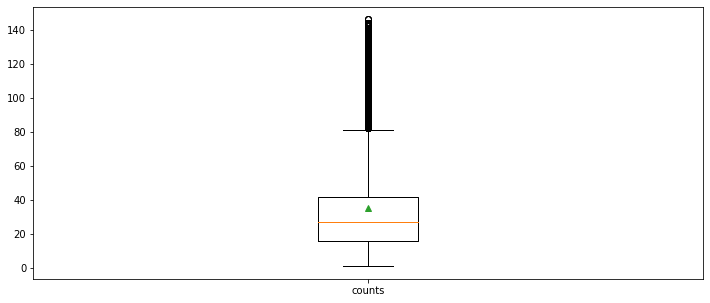

In [34]:
plt.figure(figsize=(12, 5))
# 박스플롯 생성
# 첫번째 파라메터: 여러 분포에 대한 데이터 리스트를 입력
# labels: 입력한 데이터에 대한 라벨
# showmeans: 평균값을 마크함

plt.boxplot(train_length,
             labels=['counts'],
             showmeans=True)

---
#### (나) 단어 수 분포 조사  
  - 한국어 문어체는 띄어쓰기로만 단어를 분리해 낼 수 없으나, 간단하게 띄어쓰기로 분석해 본다.

In [35]:
train_word_counts = train_no_nan_df['document'].apply(lambda x:len(x.split(' ')))

In [36]:
train_word_counts.describe()

count    149994.000000
mean          7.585163
std           6.514082
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          41.000000
Name: document, dtype: float64

Text(0, 0.5, 'Number of text')

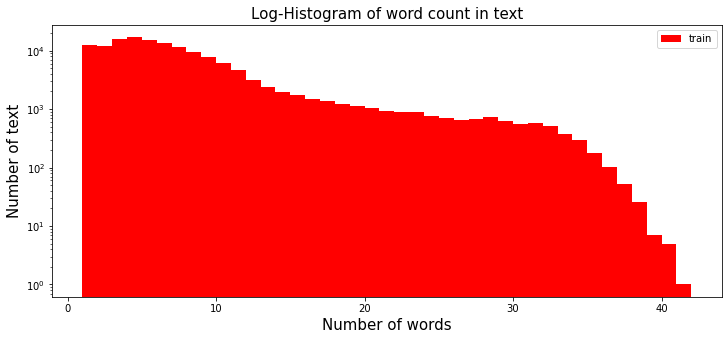

In [37]:
plt.figure(figsize=(12, 5))
plt.hist(train_word_counts,  range=(1, 42), bins=41, facecolor='r', label='train')
plt.title('Log-Histogram of word count in text', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of text', fontsize=15)

In [38]:
print('문자 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('문자 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('문자 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('문자 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('문자 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('문자 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('문자 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

문자 단어 개수 최대 값: 41
문자 단어 개수 최소 값: 1
문자 단어 개수 평균 값: 7.59
문자 단어 개수 표준편차: 6.51
문자 단어 개수 중간 값: 6.0
문자 단어 개수 제 1 사분위: 3.0
문자 단어 개수 제 3 사분위: 9.0


---
### 5) 워드 클라우드

In [39]:
# Get all the positive and negative
neg_msg = train_no_nan_df[train_no_nan_df.label == 0]['document']
pos_msg = train_no_nan_df[train_no_nan_df.label == 1]['document']

In [40]:
neg_msg.shape

(75169,)

In [41]:
pos_msg.shape

(74825,)

In [42]:
75170 + 74825

149995

In [43]:
pos_msg

1                         흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나
4         사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...
8                                    액션이 없는데도 재미 있는 몇안되는 영화
9             왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?
10                                         걍인피니트가짱이다.진짜짱이다♥
                                ...                        
149991    http://blog.naver.com/oroblast/220215679580 나쁜...
149993                   For Carl.칼 세이건으로 시작해서 칼 세이건으로 끝난다.
149994                 디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.
149996                                        평점이 너무 낮아서...
149998                          청춘 영화의 최고봉.방황과 우울했던 날들의 자화상
Name: document, Length: 74825, dtype: object

In [44]:
pos_txt = " ".join(pos_msg)

In [45]:
len(pos_txt)

2663766

In [46]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

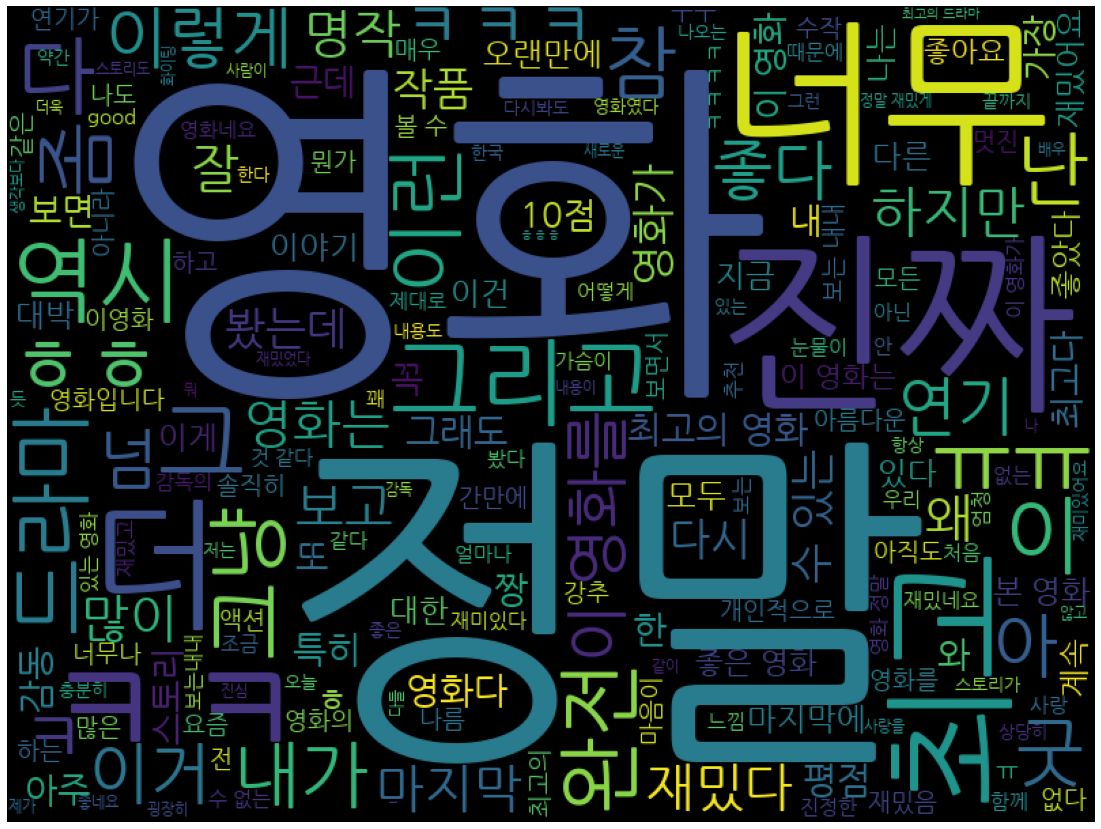

In [47]:
# 긍정 평가 데이터 워드 클라우드 표현
cloud = WordCloud(font_path='fonts/NanumGothic.ttf', width=800, height=600).generate(pos_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

In [48]:
neg_txt = " ".join(neg_msg)

(-0.5, 799.5, 599.5, -0.5)

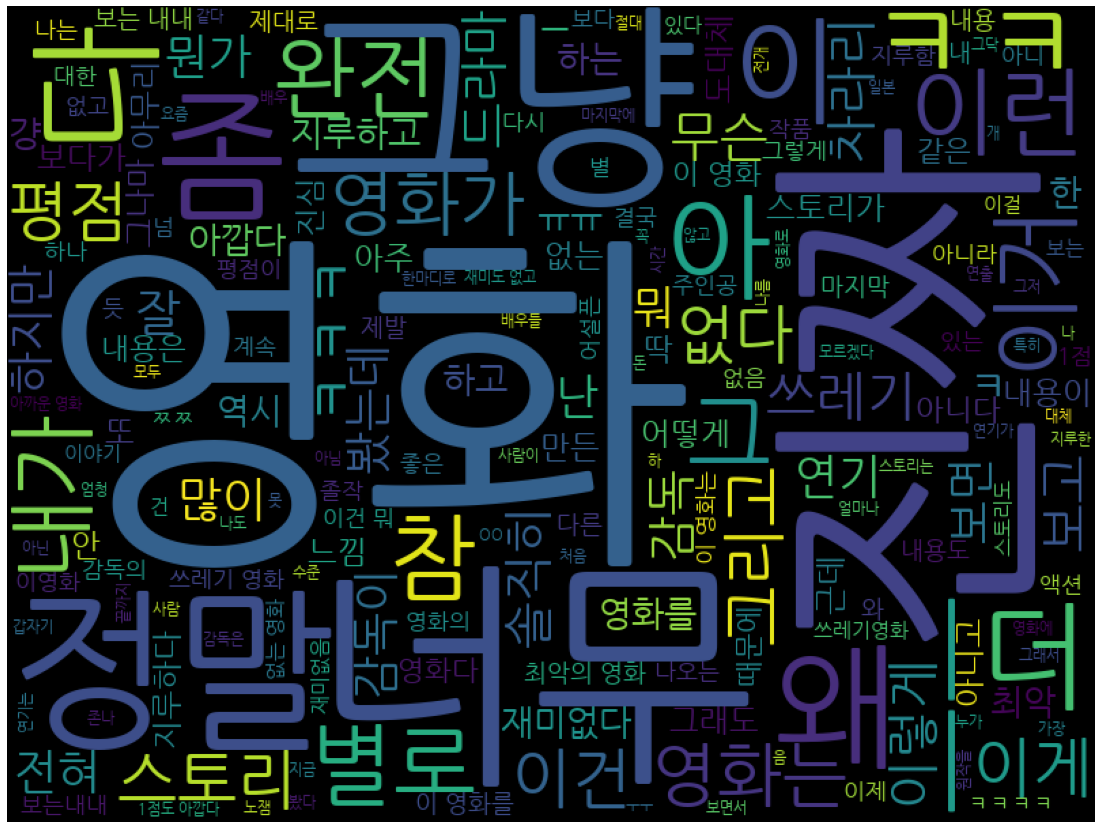

In [49]:
# 부정 평가 워드 클라우드 표현
cloud = WordCloud(font_path='fonts/NanumGothic.ttf', width=800, height=600).generate(neg_txt)
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')